In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
csv_path = 'HR_comma_sep.csv'

df = pd.read_csv(csv_path) 

df.shape

(14999, 10)

In [3]:
df = pd.get_dummies(df, columns=['sales'])

salary_maping = {'low':0, 'medium':1, 'high':2}
df['salary_encoded'] = df['salary'].map(salary_maping)

df = df.drop(columns=['salary'], inplace=False)

print(df.isna().sum)

<bound method DataFrame.sum of        satisfaction_level  last_evaluation  number_project  \
0                   False            False           False   
1                   False            False           False   
2                   False            False           False   
3                   False            False           False   
4                   False            False           False   
...                   ...              ...             ...   
14994               False            False           False   
14995               False            False           False   
14996               False            False           False   
14997               False            False           False   
14998               False            False           False   

       average_montly_hours  time_spend_company  Work_accident   left  \
0                     False               False          False  False   
1                     False               False          False  False   
2    

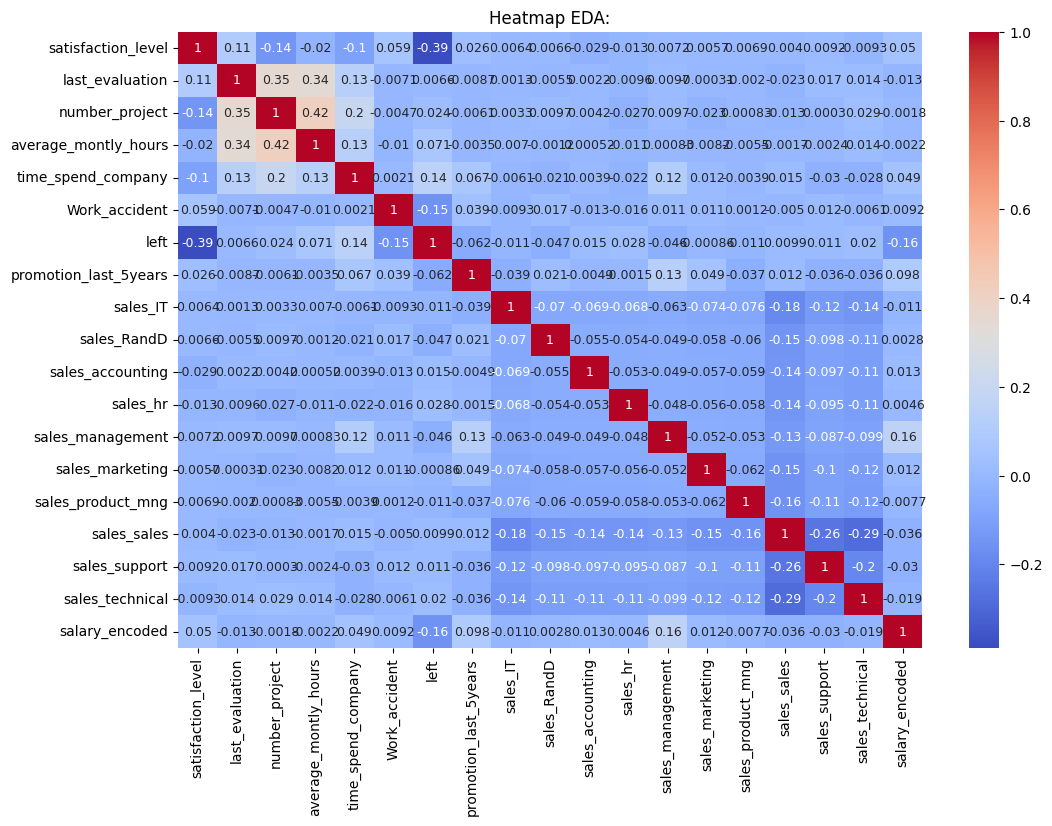

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',annot_kws={"fontsize": 9})
plt.title('Heatmap EDA:')
plt.show()

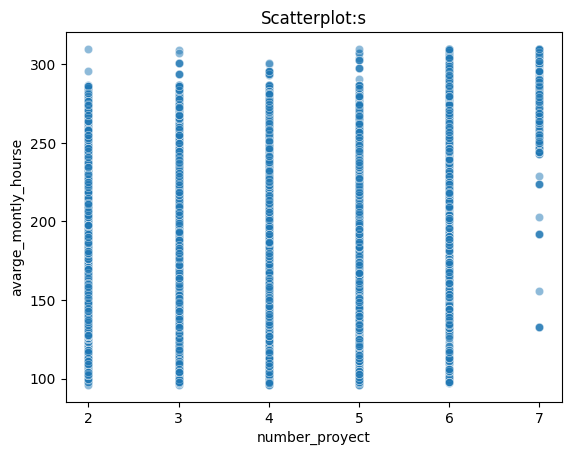

In [5]:
sns.scatterplot(data=df, x='number_project', y='average_montly_hours',alpha=0.5)
plt.title('Scatterplot:s')
plt.xlabel('number_proyect')
plt.ylabel('avarge_montly_hourse')
plt.show()

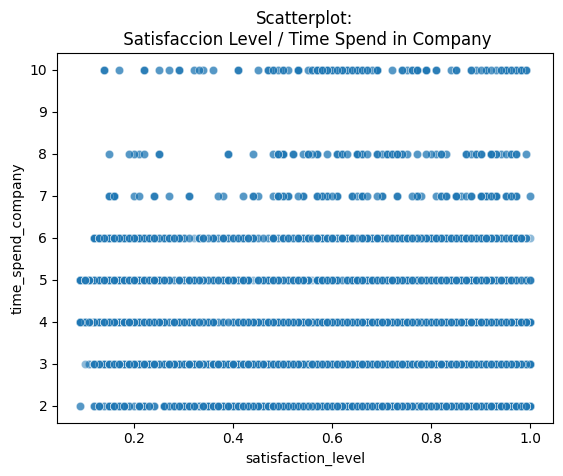

In [6]:
sns.scatterplot(df, x='satisfaction_level', y='time_spend_company', alpha=0.5)
plt.title('Scatterplot:\n Satisfaccion Level / Time Spend in Company')
plt.show()

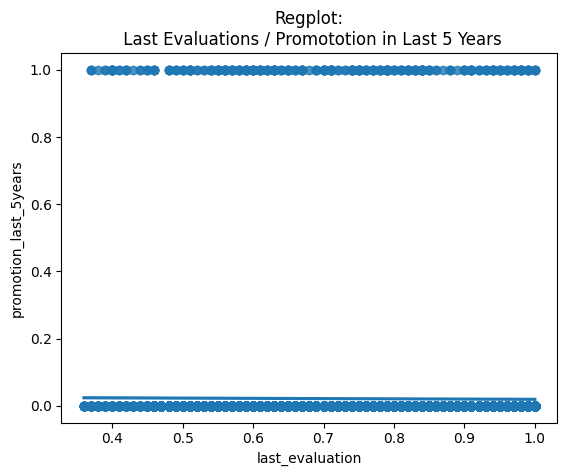

In [7]:
sns.regplot(x="last_evaluation", y="promotion_last_5years", data=df)
plt.title('Regplot:\n Last Evaluations / Promototion in Last 5 Years')
plt.show()

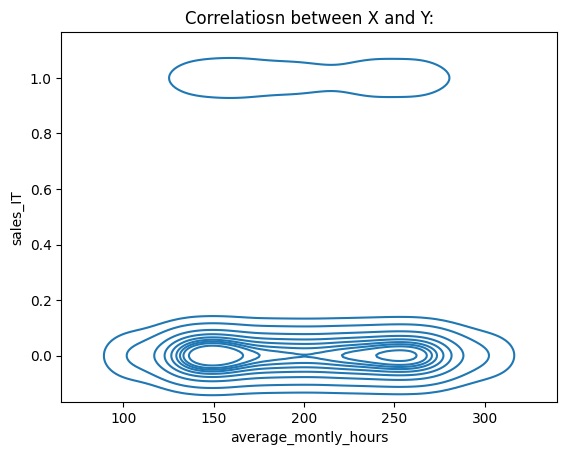

In [8]:
sns.kdeplot(x="average_montly_hours", y="sales_IT", data=df)
plt.title('Correlatiosn between X and Y:')
plt.show()


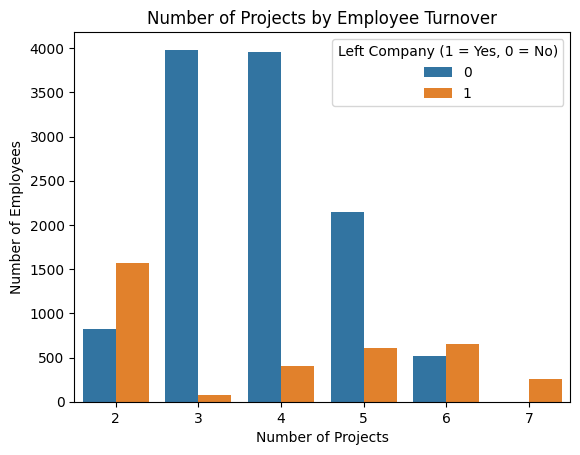

In [9]:
sns.countplot(x='number_project', hue='left', data=df)
plt.title("Number of Projects by Employee Turnover")
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")
plt.legend(title='Left Company (1 = Yes, 0 = No)')
plt.show()

In [10]:
### Chaking dtype to complete the plt.legend ###
print(df['left'].dtype)
print(df['number_project'].dtype)

int64
int64


/var/folders/sn/83_04zmn3dgf5s366ldfm1lr0000gn/T/ipykernel_94718/1189113547.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employees['cluster'] = kmeans.fit_predict(features)


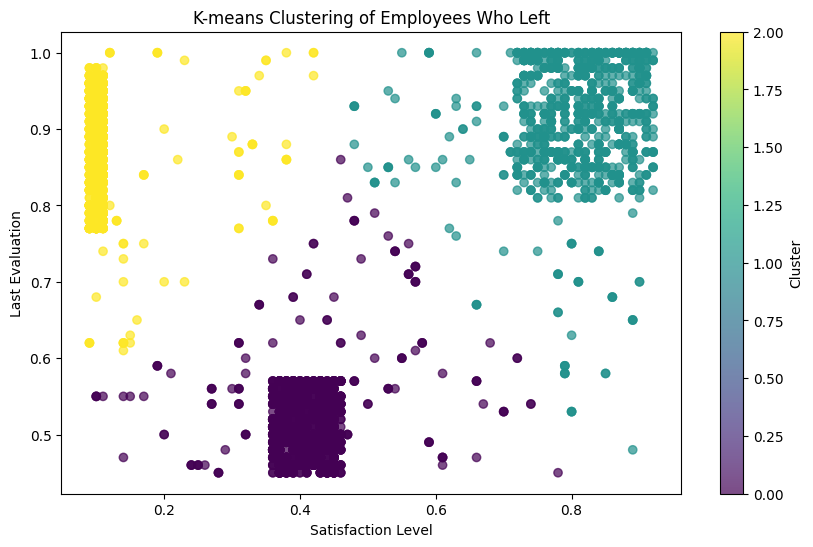

In [11]:
left_employees = df[df['left'] == 1]

features = left_employees[['satisfaction_level', 'last_evaluation']]

kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(left_employees['satisfaction_level'], left_employees['last_evaluation'], c=left_employees['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('K-means Clustering of Employees Who Left')
plt.colorbar(label='Cluster')
plt.show()

In [12]:
df['left'].value_counts()
# sns.countplot(x='left', data=df)
# plt.title('clearly show one bar being much taller')
# plt.show()

left
0    11428
1     3571
Name: count, dtype: int64

In [13]:
#### Usisng SMOTE technique ###

X=df.drop('left', axis=1)   # ---------> difinding X 
y= df['left']  # ---------> difinding y 


X_train ,X_test , y_train, y_test = train_test_split(
    X, y, test_size=0.3,stratify=y, random_state=42)     # ------> spliting our data  
smote = SMOTE(random_state=123)
X_train_sm , y_train_sm = smote.fit_resample(X_train, y_train) # Fitting the model, just with our train data!

print('count values before SMOTE:', y_train.value_counts()) # -----> How y_train look before SMOTE
print('Count values after SMOTE:', pd.Series(y_train_sm).value_counts()) # ------> After SMOTE


count values before SMOTE: left
0    7999
1    2500
Name: count, dtype: int64
Count values after SMOTE: left
0    7999
1    7999
Name: count, dtype: int64


In [14]:
### Separing Categorical values form the numerical ones ###
categorical_cols = [col for col in df.columns if df[col].dtype == 'bool'] + ['salary_encoded'] # -------> going true the every cplumn on our df and trying to get all the Bool dtype

numeric_cols = [
    'satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours',
    'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'] # -------> Storing our numeric columns to a di


encoder = OneHotEncoder(sparse_output=False)
categorical_encoder = encoder.fit_transform(df[categorical_cols]) # -----> Fiting our encode with our  df and boolin dtype

categorical_encoded_df = pd.DataFrame(
    categorical_encoder, 
    columns=encoder.get_feature_names_out(categorical_cols)
)

processed = pd.concat([df[numeric_cols], categorical_encoded_df],axis=1)

print(f'So now we are lookinf to the:\n True categories ==(1)\n False categories that are in == (0)\n','\n',f'Each row represents one employ:\n{categorical_encoder}')

# processed ----> printing the new df columns 

So now we are lookinf to the:
 True categories ==(1)
 False categories that are in == (0)
 
 Each row represents one employ:
[[1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]]


In [15]:
### Our new model with better performance ###

X= processed.drop('left', axis=1)
y = processed['left']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)


In [16]:
forest_model = RandomForestClassifier(random_state=123)

forest_model.fit(X_train, y_train)

forest_pred = forest_model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test,forest_pred))
print('Classification Report:', classification_report(y_test,forest_pred))



Accuracy Score: 0.99
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2291
           1       0.99      0.97      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [17]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test,tree_pred))
print('Classification Report:', classification_report(y_test,tree_pred))

Accuracy Score: 0.9813333333333333
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2291
           1       0.94      0.98      0.96       709

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [18]:
### Adding SMOTE with our new data frame ###

smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('count values before SMOTE:', y_train.value_counts()) # -----> Before SMOTE
print('Count values after SMOTE:', pd.Series(y_train_sm).value_counts()) # ------> After SMOTE

count values before SMOTE: left
0    9137
1    2862
Name: count, dtype: int64
Count values after SMOTE: left
0    9137
1    9137
Name: count, dtype: int64


In [19]:
forest_scores = cross_val_score(forest_model, X_train_sm, y_train_sm, cv=5, scoring='accuracy')

print("Cross-validation scores for Forest:\n", forest_scores)
print("Average accuracy score for Forest:\n", forest_scores.mean())

print('')

tree_score = cross_val_score(tree_model,X_train_sm, y_train_sm, cv=5, scoring='accuracy')
print("Cross-validation scores for  Tree:\n", tree_score)
print("Average accuracy score for Tree:\n", tree_score.mean())

logistic_regression_model = LogisticRegression() # ... creating model just for test croos validation 

logistic_regression_predict = cross_val_predict(logistic_regression_model, X_train_sm, y_train_sm, cv=5)
print("Cross-validation predict for LOG:\n", logistic_regression_predict)
print("Average accuracy score for LOG:\n", logistic_regression_predict.mean())

print('')

gradient_boosting_classifier_model =  GradientBoostingClassifier() # ... creating model just for test croos validation 

gradient_boosting_classifier_score = cross_val_score(gradient_boosting_classifier_model, X_train_sm, y_train_sm, cv=5, scoring='accuracy')
print("Cross-validation scores:", gradient_boosting_classifier_score)
print("Average accuracy:", gradient_boosting_classifier_score.mean())



Cross-validation scores for Forest:
 [0.97291382 0.98495212 0.98850889 0.98248974 0.984948  ]
Average accuracy score for Forest:
 0.9827625142545658

Cross-validation scores for  Tree:
 [0.96580027 0.96361149 0.97127223 0.97400821 0.97126437]
Average accuracy score for Tree:
 0.9691913140556945


/Users/andreslinero/miniconda3/envs/andres_env_py312/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andreslinero/miniconda3/envs/andres_env_py312/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Cross-validation predict for LOG:
 [0 0 1 ... 0 1 1]
Average accuracy score for LOG:
 0.5269234978658203

Cross-validation scores: [0.95430917 0.95923393 0.96580027 0.96169631 0.96606459]
Average accuracy: 0.9614208516873737


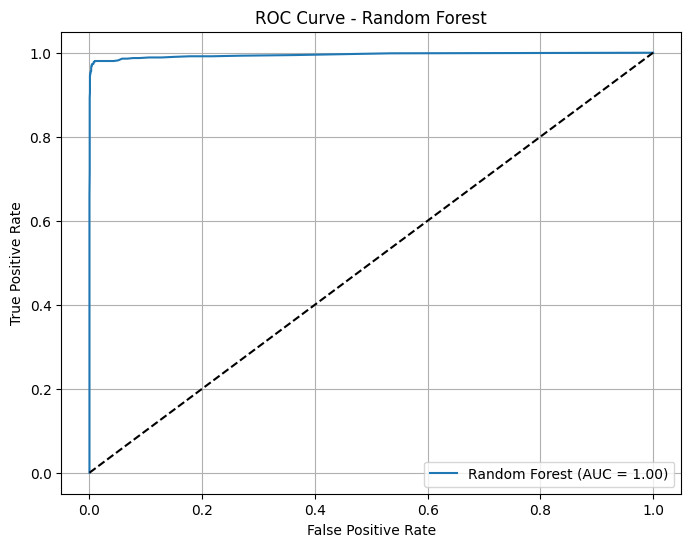

In [20]:
y_probs = forest_model.predict_proba(X_test)[:, 1] 

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

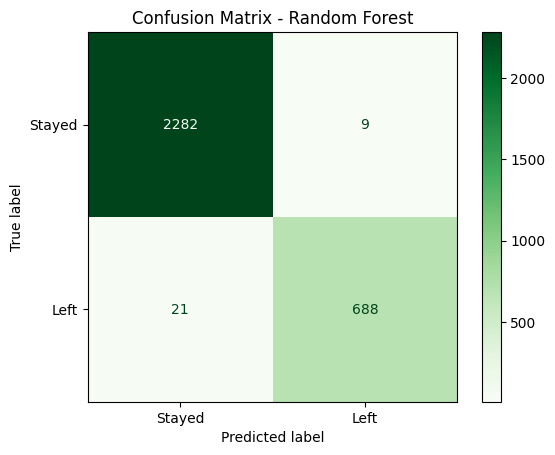

In [21]:
cm_rf = confusion_matrix(y_test, forest_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

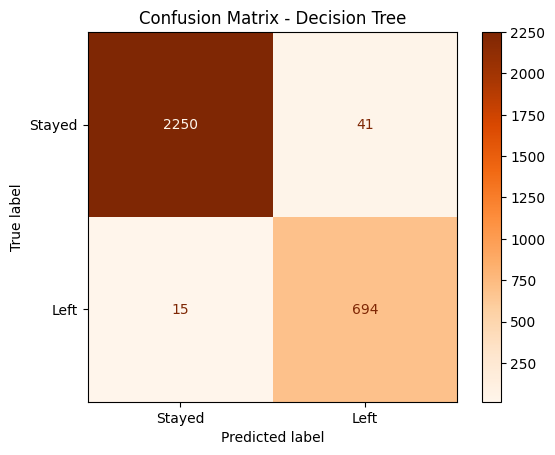

In [22]:
cm_tree = confusion_matrix(y_test, tree_pred)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=["Stayed", "Left"])
disp_tree.plot(cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Report Paragraph: Model Justification Based on Confusion Matrix

After comparing the confusion matrices of the Decision Tree and Random Forest models, both classifiers performed well in predicting employee turnover. However, the selection of the best model depends on the business priority. In this case, minimizing false negatives (employees who actually left but were predicted to stay) is critical, since missing a potential leaver means losing the opportunity to intervene and retain them.

The Decision Tree model produced slightly fewer false negatives (31) compared to the Random Forest (36), achieving a marginally higher recall for the "left" class. Therefore, despite the Random Forest having higher overall accuracy and precision, the Decision Tree is considered the more suitable model for this use case because it prioritizes recall — helping the company catch more at-risk employees before they leave.

risk_zone
Safe Zone (Green)            2247
High-Risk Zone (Red)          610
Medium-Risk Zone (Orange)      86
Low-Risk Zone (Yellow)         57
Name: count, dtype: int64


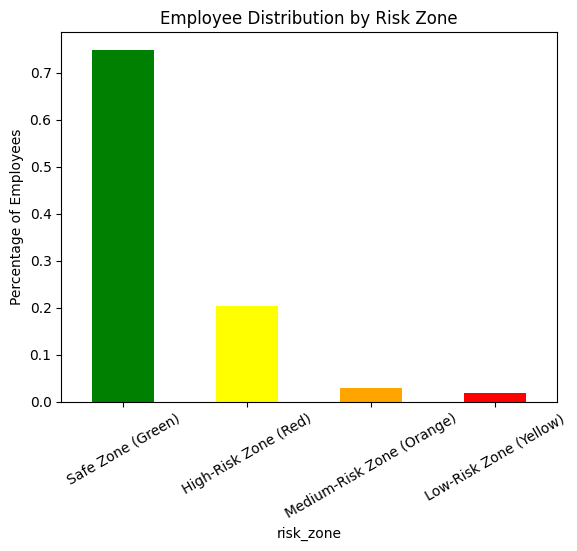

In [23]:
# Add predictions and probabilities to a DataFrame
zone_df = X_test.copy()
zone_df['probability_left'] = y_probs
zone_df['actual_left'] = y_test.values

def categorize_risk(score):
    if score < 0.20:
        return 'Safe Zone (Green)'
    elif score < 0.60:
        return 'Low-Risk Zone (Yellow)'
    elif score < 0.90:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

zone_df['risk_zone'] = zone_df['probability_left'].apply(categorize_risk)


zone_df['risk_zone'].value_counts(normalize=True).plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
print(zone_df['risk_zone'].value_counts())
plt.title("Employee Distribution by Risk Zone")
plt.ylabel("Percentage of Employees")
plt.xticks(rotation=30)
plt.show()